# Basic Convolutional Neural Networks (CNN)
- Objective: create basic CNN models with Keras

<img src="https://adeshpande3.github.io/assets/Cover.png" style="width: 800px"/>

<br>
- Fundamental CNN structures: CNNs are similar to MLPs since they only feed signals forward (feedforward nets), but have different kind of layers unique to CNNs
    - ** Convolutional layer** : process data in a small receptive field (i.e., filter)
    - ** Pooling layer** : downsample along 2 dimensions (usually width and height) 
    - ** Dense (fully connected) layer** : similar to hidden layers of MLPs

<img src="http://cs231n.github.io/assets/cnn/convnet.jpeg" style="width: 600px"/>
<br>
<center> **ConvNet architecture** </center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import os
os.chdir("E:/pythontraining/completeimarticus_tutorial/DL/cnn/CNN/1-Basic-CNN/")

### Load Datset
- Digits dataset in sklearn
- Doc: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [3]:
data = datasets.load_digits()

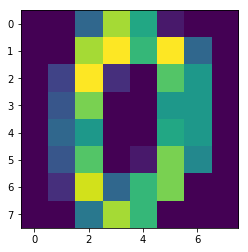

label:  0


In [4]:
plt.imshow(data.images[0])    # show first number in the dataset
plt.show()
print('label: ', data.target[0])    # label = '0'

In [5]:
X_data = data.images
y_data = data.target

In [6]:
# shape of data
print(X_data.shape)    # (8 X 8) format
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [7]:
# reshape X_data into 3-D format
# note that this follows image format of Tensorflow backend
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))

In [8]:
# one-hot encoding of y_data
y_data = to_categorical(y_data)

In [9]:
# partition data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [11]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

### 1. Creating model
- Creating a model is same with MLP (Sequential)

In [12]:
model = Sequential()

### 2. Convolutional Layer
- In general, 2D convolutional layer is used for image processing
    - Size of filter (designated by 'kernel_size' parameter) defines **width and height of receptive field **
    - Number of filters (designated by 'filters' parameter) is equal to **depth of the next layer**
    - Strides (designated by 'strides' parameter) is** how far a filter makes change in its position** for each move
    - Image can be **zero-padded** in order to prevent getting too small (designated by 'padding' parameter)
- Doc: https://keras.io/layers/convolutional/
<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width: 400px"/>

In [13]:
# convolution layer
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

### 3. Activation Layer
- Identical to the activation layers in MLP
- In general, relu is used as well
- Doc: http://cs231n.github.io/assets/cnn/depthcol.jpeg

In [14]:
model.add(Activation('relu'))

### 4. Pooling layer
- In general, max pooling method is used
- Reduces number of parameters
- Doc: https://keras.io/layers/pooling/
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width: 600px"/>

In [15]:
model.add(MaxPooling2D(pool_size = (2,2)))

### 5. Dense (fully connected layer)
- Convolutional & pooling layers can be connected to dense layers
- Sometimes, dense layers can be omitted
- Doc: https://keras.io/layers/core/

In [16]:
# prior layer should be flattend to be connected to dense layers
model.add(Flatten())

In [17]:
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))

In [18]:
# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax'))

### 6. Model compile & train
- Identical to compiling MLP models

In [19]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [20]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1)

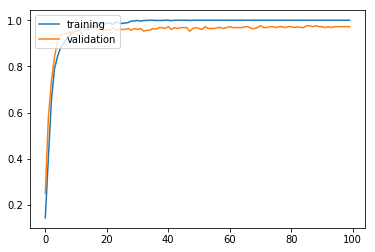

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [23]:
results = model.evaluate(X_test, y_test)

540/540 [==============================] - 5s 10ms/step


In [24]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9722222222222222


Even simple CNN model shows fine performance of **97% **test accuracy